# Supervised Learning - Classification

### Implement the Naive Bayes and K-Nearest Neighbours algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization. The algorithm must be implemented as a function with arguments, x_train (the features) and y_train (the output). Usage of any library that has an implementation is forbidden. The code must be uploaded to the portal and GitHub and be in Python Notebook format (.ipynb file). The GitHub link is to be attached. The repository has to be open. Evaluation will be done on the code formatting, the final accuracy results, and small explanations of any data preprocessing done (data preprocessing and visualization has bonus points). The explanations must also be included in the same python notebook which can be done using markdown cells. The Python version to be used must be above 3.5.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
data=pd.read_csv('C:\\Users\\91923\\Downloads\\titanic\\train.csv')

In [30]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Implementing Algorithm Class

In [31]:
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        
        '''
        X and y denotes the features and the target labels respectively
        '''
        self.X, self.y = X, y 
        
        self.N = len(self.X) # Length of the training set

        self.dim = len(self.X[0]) # Dimension of the vector of features

        self.attrs = [[] for _ in range(self.dim)] # Storing the columns of the training set

        self.output_dom = {} # Output classes with the number of ocurrences in the training set. In this case we have only 2 classes

        self.data = [] 
        
        
        for i in range(len(self.X)):
            for j in range(self.dim):
                if not self.X[i][j] in self.attrs[j]:
                    self.attrs[j].append(self.X[i][j])
            if not self.y[i] in self.output_dom.keys():
                self.output_dom[self.y[i]] = 1
            else:
                self.output_dom[self.y[i]] += 1
            # stores the row
            self.data.append([self.X[i], self.y[i]])
            
            

    def classify(self, entry):

        solve = None 
        max_arg = -1 

        for y in self.output_dom.keys():

            prob = self.output_dom[y]/self.N

            for i in range(self.dim):
                cases = [x for x in self.data if x[0][i] == entry[i] and x[1] == y]
                n = len(cases)
                prob *= n/self.N 
            if prob > max_arg:
                max_arg = prob
                solve = y

        return solve

## Code

In [32]:
import pandas as pd
data = pd.read_csv('C:\\Users\\91923\\Downloads\\titanic\\titanic.csv')
print(data.head())
y = list(map(lambda v: 'yes' if v == 1 else 'no', data['Survived'].values)) 
X = data[['Pclass', 'Gender', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']].values 

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

   Gender   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [33]:
print(len(y))
X_train = X[:600]
X_val = X[600:]
y_train = y[:600]
y_val = y[600:]

887


In [34]:
a = NaiveBayesClassifier(X_train, y_train)


total_cases = len(y_val) 
good = 0
bad = 0

for i in range(total_cases):
    predict = a.classify(X_val[i])
    if y_val[i] == predict:
        good += 1
    else:
        bad += 1

print('TOTAL EXAMPLES:', total_cases)
print('GOOD:', good)
print('BAD:', bad)
print('ACCURACY:', good/total_cases)

TOTAL EXAMPLES: 287
GOOD: 200
BAD: 87
ACCURACY: 0.6968641114982579


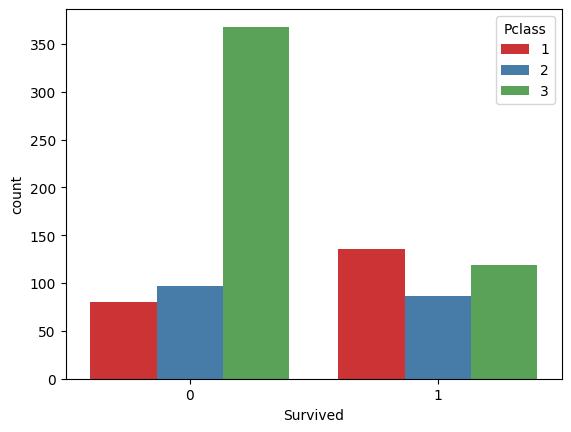

In [35]:
sns.countplot( x='Survived', data=data, hue="Pclass", palette="Set1");


In [ ]:
sns.countplot( x='Survived', data=data, hue="Sex", palette="Set1");


In [ ]:
sns.countplot( x='Survived', data=data, hue="SibSp", palette="Set1");


In [ ]:
sns.countplot( x='Survived', data=data, hue="Parch", palette="Set1");


In [ ]:
sns.countplot( x='Survived', data=data, hue="Embarked", palette="Set1");
